In [1]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



# analysis

In [2]:
datasetName = '/stor/public/hcad/Pleura_LeftThoracicWall_HCLAdult1/Pleura_LeftThoracicWall_HCLAdult1'

In [3]:
# scRNA
raw_data <- read.csv(paste0(datasetName, "_expression.tsv"),header = TRUE, sep='\t',row.names = 1)

In [4]:
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)

In [5]:
# build object
dataobj <- CreateSeuratObject(counts = raw_data, project = "HCAd",meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [6]:
dataobj

An object of class Seurat 
26627 features across 19695 samples within 1 assay 
Active assay: RNA (26627 features, 0 variable features)

In [7]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Centering and scaling data matrix



In [8]:
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))

PC_ 1 
Positive:  FBN1, PI16, MFAP5, COL1A2, COL1A1, COL3A1, IGFBP5, LUM, FBLN1, CFD 
	   IGFBP7, SPARC, FN1, DCN, CXCL12, S100A9, S100A8, SFRP4, C1QTNF3, CILP 
	   ASPN, ALOX5AP, S100A12, C17orf58, DPT, LCN2, MMP8, HTRA3, PGLYRP1, LTF 
Negative:  ITLN1, TIMP1, TPT1, EEF1A1, HP, KRT19, RPS6, UPK3B, RPS12, RPS18 
	   RPL31, RPS27A, KRT18, RPL21, RPL36, RPS16, RPLP1, RPL13A, RPL7, RPL32 
	   RPL37A, RPS24, RPL41, RPS14, MSLN, RPL10, TM4SF1, MT-ATP6, RPS3A, RPS23 
PC_ 2 
Positive:  DCN, COL1A2, MFAP5, LUM, COL3A1, FBN1, COL1A1, SPARC, FBLN1, CFD 
	   IGFBP5, EFEMP1, C3, FN1, C1R, CST3, SERPING1, PI16, MGP, GPX3 
	   CTGF, IGFBP7, CXCL12, PLA2G2A, APOD, IFITM3, DPT, SFRP4, ELN, C1QTNF3 
Negative:  LYZ, S100A9, S100A8, SRGN, LAPTM5, ARHGDIB, LCP1, TYROBP, GMFG, S100P 
	   FCER1G, FCN1, CSTA, ALOX5AP, MNDA, CYBB, HSPA1A, GCA, AIF1, S100A12 
	   BPI, PLAC8, PGLYRP1, RNASE2, LCN2, MMP8, DEFA3, SAMSN1, CEACAM8, RETN 
PC_ 3 
Positive:  HLA-DRA, CD163, FTL, HLA-DRB1, CD74, FTH1, CXCL8, MS4A6A, HL

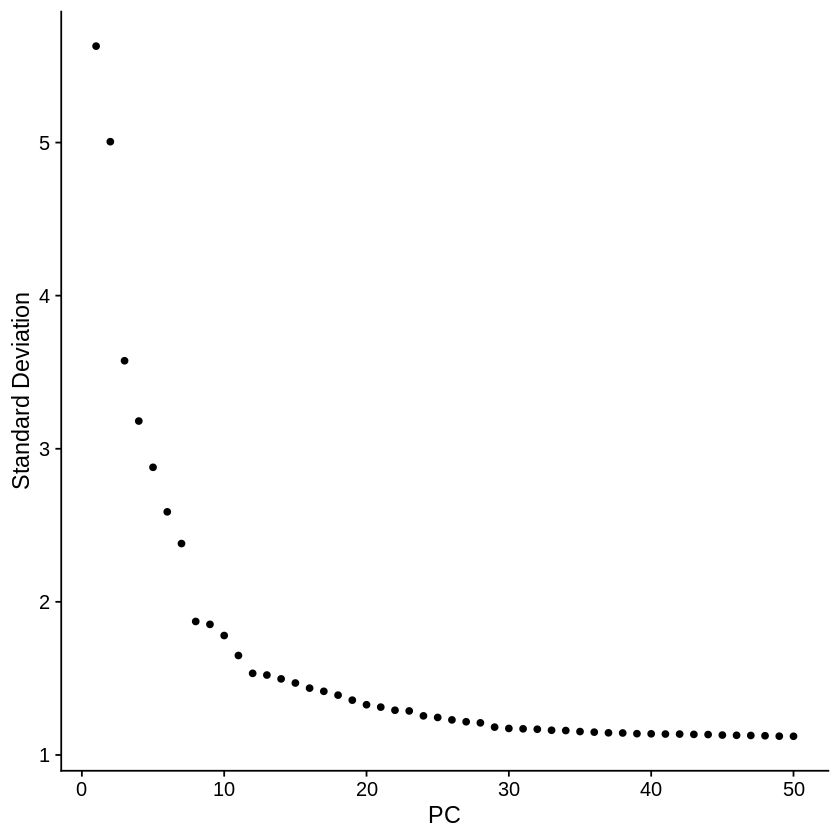

In [9]:
ElbowPlot(dataobj,50) 

In [10]:
pcDim = 30
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:04:22 UMAP embedding parameters a = 0.9922 b = 1.112

15:04:22 Read 19695 rows and found 30 numeric columns

15:04:22 Using Annoy for neighbor search, n_neighbors = 30

15:04:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

15:04:26 Writing NN index file to temp file /tmp/RtmpvVOL5k/file390b526a756a

15:04:26 Searching Annoy index using 1 thread, search_k = 3000

15:04:33 Annoy recall = 100%

15:04:34 Commencing smooth kNN distance calibration using 1 thread

15:04:35 Initializing f

In [11]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1) + NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


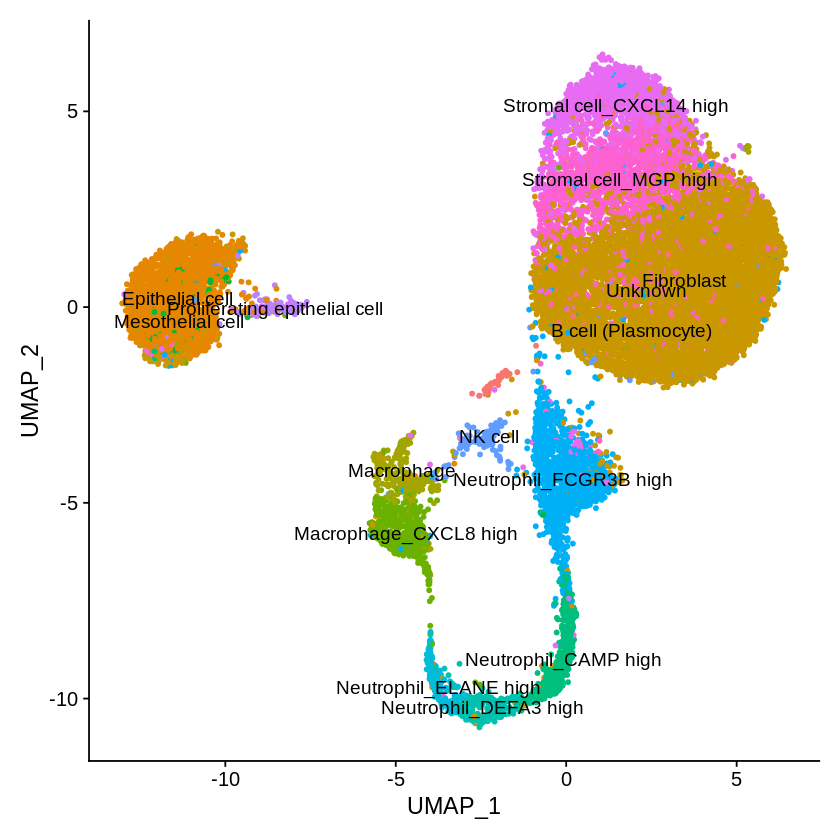

In [12]:
p_umap2

In [13]:
table(dataobj@meta.data$cell_cluster)


          B cell (Plasmocyte)               Epithelial cell 
                           99                          2272 
                   Fibroblast                    Macrophage 
                         9665                           337 
        Macrophage_CXCL8 high              Mesothelial cell 
                          564                           112 
         Neutrophil_CAMP high         Neutrophil_DEFA3 high 
                          507                           240 
        Neutrophil_ELANE high        Neutrophil_FCGR3B high 
                          212                          1630 
                      NK cell Proliferating epithelial cell 
                          204                           146 
     Stromal cell_CXCL14 high         Stromal cell_MGP high 
                         1586                          1943 
                      Unknown 
                          178 

# Clustering

In [14]:
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph

Computing SNN



In [17]:
dataobj <- FindClusters(dataobj, resolution = 1, n.start = 10)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19695
Number of edges: 670795

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8024
Number of communities: 17
Elapsed time: 4 seconds


In [19]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)

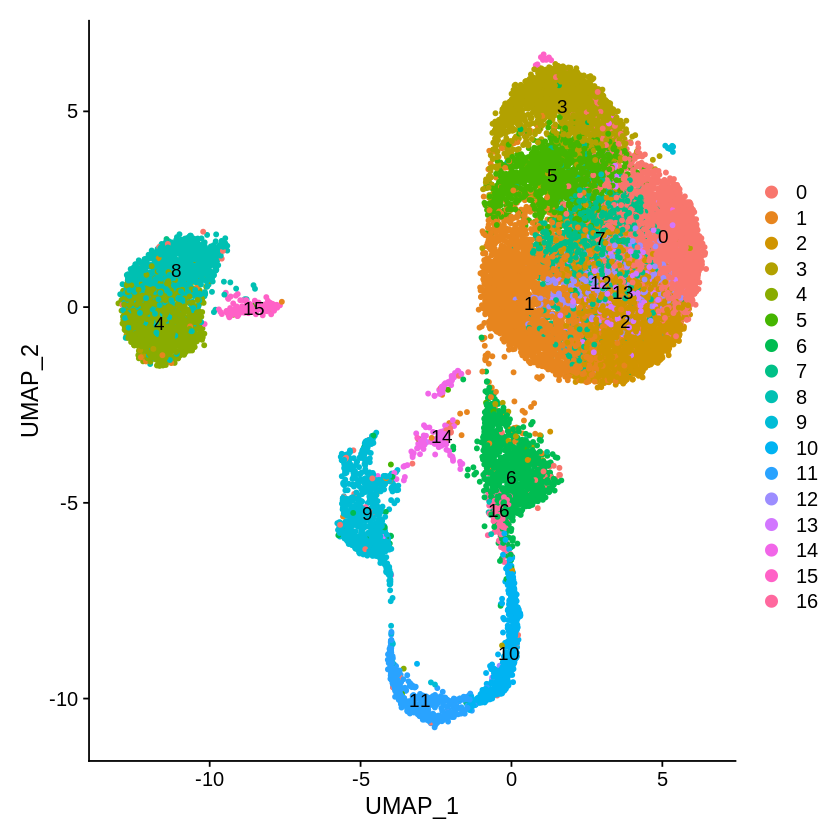

In [20]:
p_umap

# Finding cluster markers 

In [21]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16



# Annoation

In [72]:
dataobj.markers[dataobj.markers['cluster']==16,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
IFITM22,0.000000e+00,3.538831,0.922,0.073,0.000000e+00,16,IFITM2
SRGN3,4.444426e-240,2.341579,0.747,0.067,1.183417e-235,16,SRGN
S100A93,2.175994e-238,2.004839,0.747,0.063,5.794020e-234,16,S100A9
FPR13,5.397790e-176,2.479916,0.740,0.097,1.437270e-171,16,FPR1
FCGR3B1,1.982610e-175,2.497948,0.695,0.084,5.279097e-171,16,FCGR3B
BCL2A13,1.038512e-160,2.361977,0.883,0.158,2.765245e-156,16,BCL2A1
C5AR12,1.235561e-141,2.140223,0.578,0.068,3.289929e-137,16,C5AR1
CSF3R2,4.015125e-133,2.272537,0.578,0.074,1.069107e-128,16,CSF3R
ALOX5AP4,3.283585e-131,2.289886,0.805,0.158,8.743202e-127,16,ALOX5AP


In [73]:
dataobj.markers[dataobj.markers['gene']=="S100A8",]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
S100A8,0.000000e+00,4.494892,0.993,0.030,0.000000e+00,10,S100A8
S100A81,0.000000e+00,2.001902,0.471,0.048,0.000000e+00,11,S100A8
S100A82,4.421906e-122,1.521109,0.506,0.054,1.177421e-117,16,S100A8


In [77]:
new.cluster.ids <- c('Unknow',#0
                    'Pleura-Connective tissue-Fibrocyte-DCN LUM',
                    'Pleura-Connective tissue-Fibrocyte-FBLN1 COL1A2',
                    'Pleura-Connective tissue-Stromal cell-CXCL14',
                    'Pleura-Epithelial tissue-Mesothelium-MSLN UPK3B',
                    'Pleura-Connective tissue-Fibrocyte-DCN LUM',#5
                    'Pleura-Connective tissue-Neutrophilic granulocyte-FCGR3B',
                    'Pleura-Connective tissue-Fibrocyte-DCN LUM',
                    'Pleura-Epithelial tissue-Perineural epithelial cell-SLPI KRT18',
                    'Pleura-Connective tissue-Macrophage-CD74 HLA-DRA',
                    'Pleura-Connective tissue-Neutrophilic granulocyte-S100A8 S100A9',#10
                    'Pleura-Connective tissue-Neutrophilic granulocyte-S100A8 S100A9',
                    'Pleura-Connective tissue-Fibrocyte-LUM MMP2',
                    'Unknow',#13
                    'Pleura-Connective tissue-NK cell-NKG7 CCL5',
                    'Pleura-Epithelial tissue-Perineural epithelial cell-SLPI KRT18',#15
                     'Pleura-Connective tissue-Neutrophilic granulocyte-S100A8 S100A9'
                     
                    )

In [84]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 1) + NoLegend()

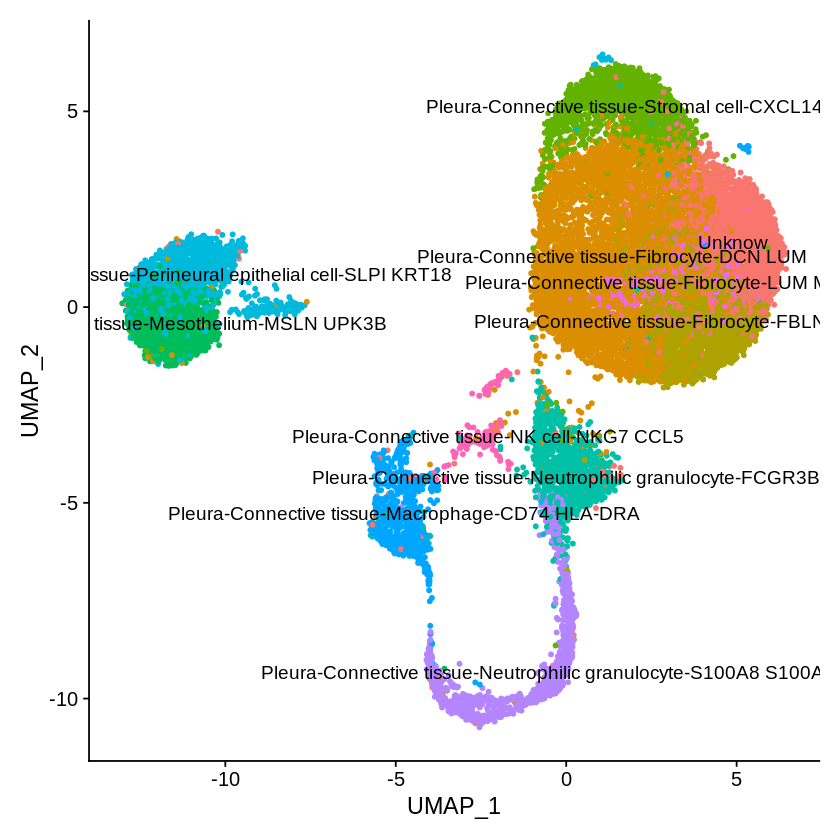

In [79]:
plot

In [80]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = plot, width = 8, height = 5)

In [81]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))

In [85]:
dataobj@meta.data$hcad.label <- Idents(dataobj)

In [86]:
dataobj@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,organ,region,subregion,sample_status,donor_ID,donor_gender,donor_age,cell_cluster,RNA_snn_res.1,seurat_clusters,hcad.label
,<fct>,<dbl>,<int>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
AdultPleura_1.AAAACGAAAGTTAAGTAC,AdultPleura,414,316,Pleura,Left thoracic wall,NA,Healthy,AdultPleura1_46Y,Male,46yr,Stromal cell_CXCL14 high,3,3,Pleura-Connective tissue-Stromal cell-CXCL14
AdultPleura_1.AAAACGAAAGTTAGCGAG,AdultPleura,475,368,Pleura,Left thoracic wall,NA,Healthy,AdultPleura1_46Y,Male,46yr,Stromal cell_CXCL14 high,3,3,Pleura-Connective tissue-Stromal cell-CXCL14
AdultPleura_1.AAAACGAAAGTTAGGACT,AdultPleura,790,620,Pleura,Left thoracic wall,NA,Healthy,AdultPleura1_46Y,Male,46yr,Stromal cell_MGP high,5,5,Pleura-Connective tissue-Fibrocyte-DCN LUM
AdultPleura_1.AAAACGAAAGTTCTCCAT,AdultPleura,835,675,Pleura,Left thoracic wall,NA,Healthy,AdultPleura1_46Y,Male,46yr,Fibroblast,2,2,Pleura-Connective tissue-Fibrocyte-FBLN1 COL1A2
AdultPleura_1.AAAACGAAAGTTGCGAAT,AdultPleura,562,421,Pleura,Left thoracic wall,NA,Healthy,AdultPleura1_46Y,Male,46yr,Stromal cell_MGP high,5,5,Pleura-Connective tissue-Fibrocyte-DCN LUM
AdultPleura_1.AAAACGAAAGTTGCTCAA,AdultPleura,775,619,Pleura,Left thoracic wall,NA,Healthy,AdultPleura1_46Y,Male,46yr,Fibroblast,13,13,Unknow
AdultPleura_1.AAAACGAAAGTTTTGGAC,AdultPleura,417,360,Pleura,Left thoracic wall,NA,Healthy,AdultPleura1_46Y,Male,46yr,Fibroblast,13,13,Unknow
AdultPleura_1.AAAACGAACGCCACTTAT,AdultPleura,910,689,Pleura,Left thoracic wall,NA,Healthy,AdultPleura1_46Y,Male,46yr,Fibroblast,2,2,Pleura-Connective tissue-Fibrocyte-FBLN1 COL1A2
AdultPleura_1.AAAACGAACGCCAGGACT,AdultPleura,1370,857,Pleura,Left thoracic wall,NA,Healthy,AdultPleura1_46Y,Male,46yr,Fibroblast,8,8,Pleura-Epithelial tissue-Perineural epithelial cell-SLPI KRT18


In [88]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [89]:
df_hca <- data.frame(rownames(dataobj@meta.data),dataobj@meta.data$hcad.label)
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [90]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)

# update annoation

In [94]:
dataobj <- readRDS("/stor/public/hcad/db_v1.1/Pleura_LeftThoracicWall_HCLAdult1/Pleura_LeftThoracicWall_HCLAdult1.seuratobj.dbupload_v1.1.rds")

In [42]:
table(dataobj$hcad_name)


                     Pleura-Connective tissue-Fibrocyte-DCN LUM 
                                                           5483 
                Pleura-Connective tissue-Fibrocyte-FBLN1 COL1A2 
                                                           2505 
                    Pleura-Connective tissue-Fibrocyte-LUM MMP2 
                                                            387 
               Pleura-Connective tissue-Macrophage-CD74 HLA-DRA 
                                                            889 
       Pleura-Connective tissue-Neutrophilic granulocyte-FCGR3B 
                                                           1341 
Pleura-Connective tissue-Neutrophilic granulocyte-S100A8 S100A9 
                                                           1160 
                     Pleura-Connective tissue-NK cell-NKG7 CCL5 
                                                            200 
                   Pleura-Connective tissue-Stromal cell-CXCL14 
                        

In [43]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Centering and scaling data matrix



In [44]:
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
dataobj <- RunUMAP(dataobj, dims = 1:50)

PC_ 1 
Positive:  LYZ, S100A8, SRGN, LAPTM5, TYROBP, GMFG, ARHGDIB, FCER1G, FCN1, S100P 
	   MNDA, ALOX5AP, CSTA, S100A12, CYBB, GCA, AIF1, SAMSN1, HSPA1A, LST1 
	   PGLYRP1, CXCL8, MMP8, CD53, CTSS, BCL2A1, CORO1A, LGALS13, ITGB2, BPI 
Negative:  DCN, CCDC80, FSTL1, COL1A2, MFAP5, LUM, COL3A1, FBN1, SPARC, COL1A1 
	   C3, EFEMP1, CFD, FBLN1, IGFBP5, SERPING1, C1R, FN1, CST3, MGP 
	   SFRP2, GPX3, IFITM3, ITM2A, COL14A1, LTBP3, LOX, PLA2G2A, PI16, CCN2 
PC_ 2 
Positive:  PI16, FSTL1, FBN1, SFRP2, MFAP5, IGFBP5, COL1A1, COL1A2, LTBP3, COL3A1 
	   ADAMTS5, COL14A1, FBLN1, ACKR3, LOX, S100A8, ITM2A, TRIO, LUM, CCN5 
	   SFRP4, CD248, MMP8, PGLYRP1, FN1, C1QTNF3, SPARC, CRISP3, LCN2, S100A12 
Negative:  RPS6, EEF1A1, RPS18, ITLN1, RPL21, RPS27A, RPL31, RPLP1, RPL7, TPT1 
	   RPL13A, RPL32, RPS27, RPS14, RPS16, RPL36, TIMP1, RPS24, RPL41, RPS19 
	   RPL37A, RPS3A, RPS23, RPS29, RPS25, RPL37, MT-ATP6, MT-CO2, RPL30, RPL9 
PC_ 3 
Positive:  FTH1, FTL, CD163, CXCL8, HLA-DRA, HLA-DRB1, MS4A6A, 

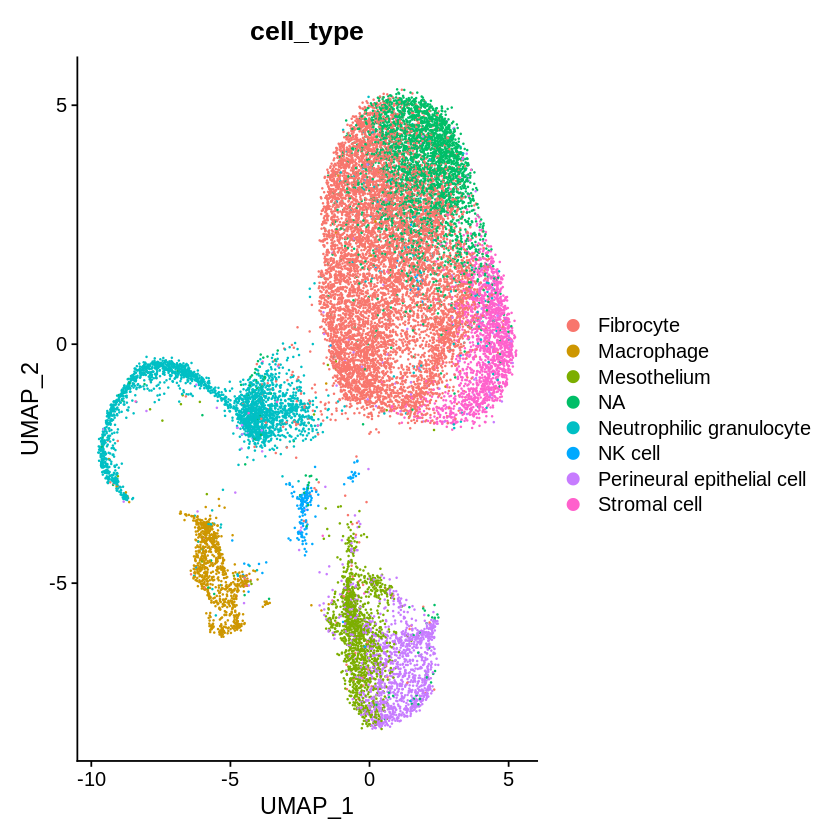

In [45]:
DimPlot(dataobj,group.by="cell_type")

In [47]:
dataobj$cell_type[dataobj$hcad_name =="Unclassified"] <- "Fibrocyte"
dataobj$marker_gene[dataobj$hcad_name =="Unclassified"] <- "DCN LUM"
dataobj$tissue_type[dataobj$hcad_name =="Unclassified"] <- "Connective tissue"
dataobj$hcad_name[dataobj$hcad_name =="Unclassified"] <- "Pleura-Connective tissue-Fibrocyte-DCN LUM"

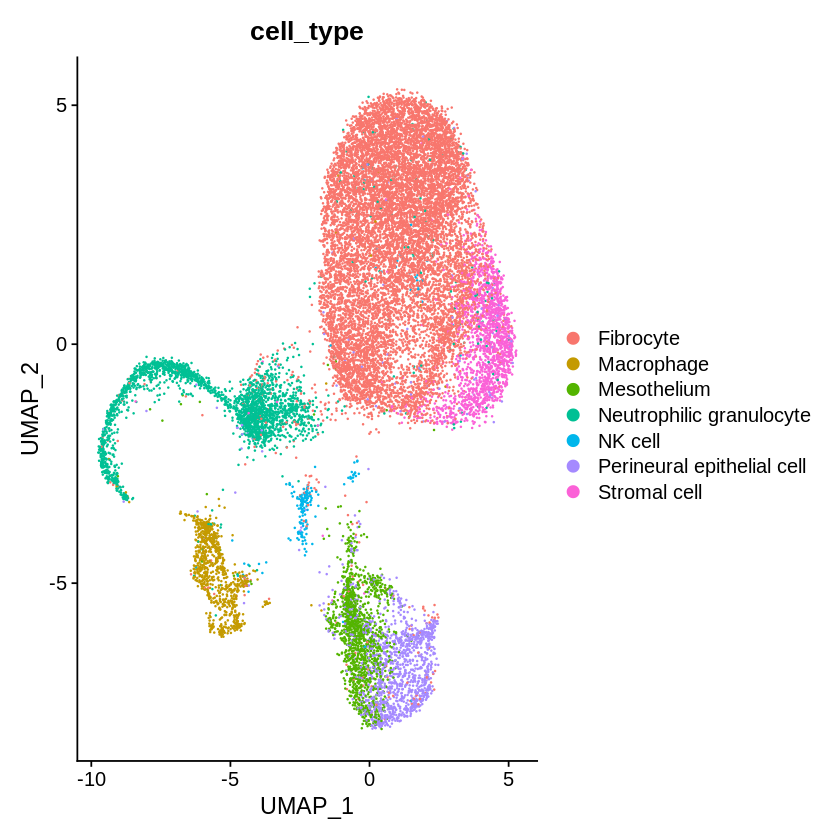

In [48]:
DimPlot(dataobj,group.by="cell_type")

In [49]:
saveRDS(dataobj,"/stor/public/hcad/db_v1.1/Pleura_LeftThoracicWall_HCLAdult1/Pleura_LeftThoracicWall_HCLAdult1.seuratobj.dbupload_v1.1.rds")